<a href="https://colab.research.google.com/github/JohanMonster/MyRepos/blob/master/ML_Comp_checkpoint_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import lightgbm
from sklearn.metrics import mean_squared_error
#from catboost import CatBoostRegressor



In [0]:
data=pd.read_csv('./train_file.csv')

In [0]:
data.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55399 entries, 0 to 55398
Data columns (total 17 columns):
Patient_ID                  55399 non-null int64
YEAR                        55399 non-null int64
LocationDesc                55399 non-null object
Subtopic                    55399 non-null int64
Greater_Risk_Question       55399 non-null object
Description                 55399 non-null object
Sample_Size                 55399 non-null int64
Sex                         55399 non-null object
Race                        55399 non-null object
Grade                       55399 non-null int64
GeoLocation                 52098 non-null object
QuestionCode                55399 non-null object
StratID1                    55399 non-null int64
StratID2                    55399 non-null int64
StratID3                    55399 non-null int64
StratificationType          55399 non-null object
Greater_Risk_Probability    55399 non-null float64
dtypes: float64(1), int64(8), object(8)
memory u

In [0]:
data.groupby('QuestionCode')['Greater_Risk_Probability'].mean()

QuestionCode
H40             74.950611
H41             29.903339
H42             44.446251
H43             46.987189
H44             16.315637
H45              6.836285
H46             45.154858
H47             14.137245
H48             27.077980
H49             10.822977
H50             16.389092
H51              6.664864
H52              8.920334
H53             10.893108
H54             12.281316
H55              7.531894
H56             18.366415
H57              5.853088
H58             33.056182
QNHALLUCDRUG    11.302425
Name: Greater_Risk_Probability, dtype: float64

In [0]:
data.groupby('Race')['Greater_Risk_Probability'].mean()

Race
American Indian or Alaska Native             28.098657
Asian                                        16.842095
Black or African American                    23.245925
Hispanic or Latino                           25.993747
Multiple Race                                25.291991
Native Hawaiian or Other Pacific Islander    26.724923
Total                                        24.336548
White                                        24.774663
Name: Greater_Risk_Probability, dtype: float64

In [0]:
data.groupby('Grade')['StratID1'].value_counts().plot.bar()

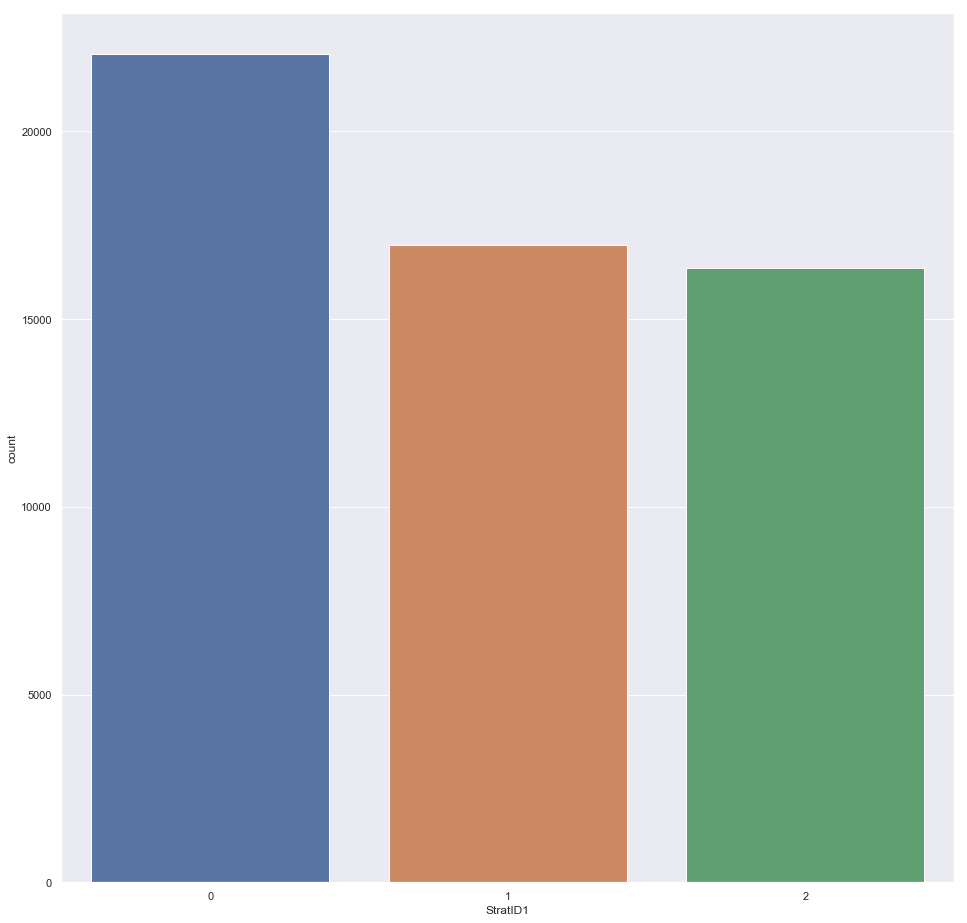

In [0]:
sns.countplot(x=data.StratID1)

C:\Users\alpha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


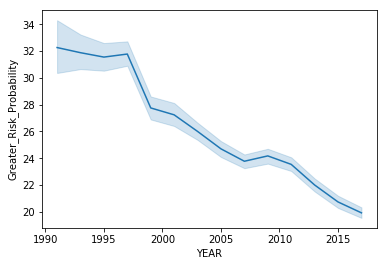

In [0]:
sns.lineplot(x=data.YEAR,y=data.Greater_Risk_Probability)

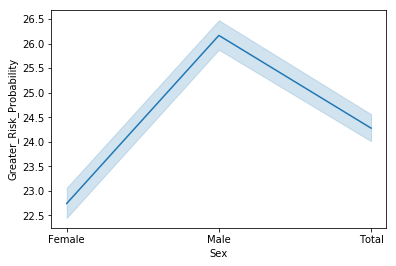

In [0]:
sns.lineplot(x=data.Sex,y=data.Greater_Risk_Probability)

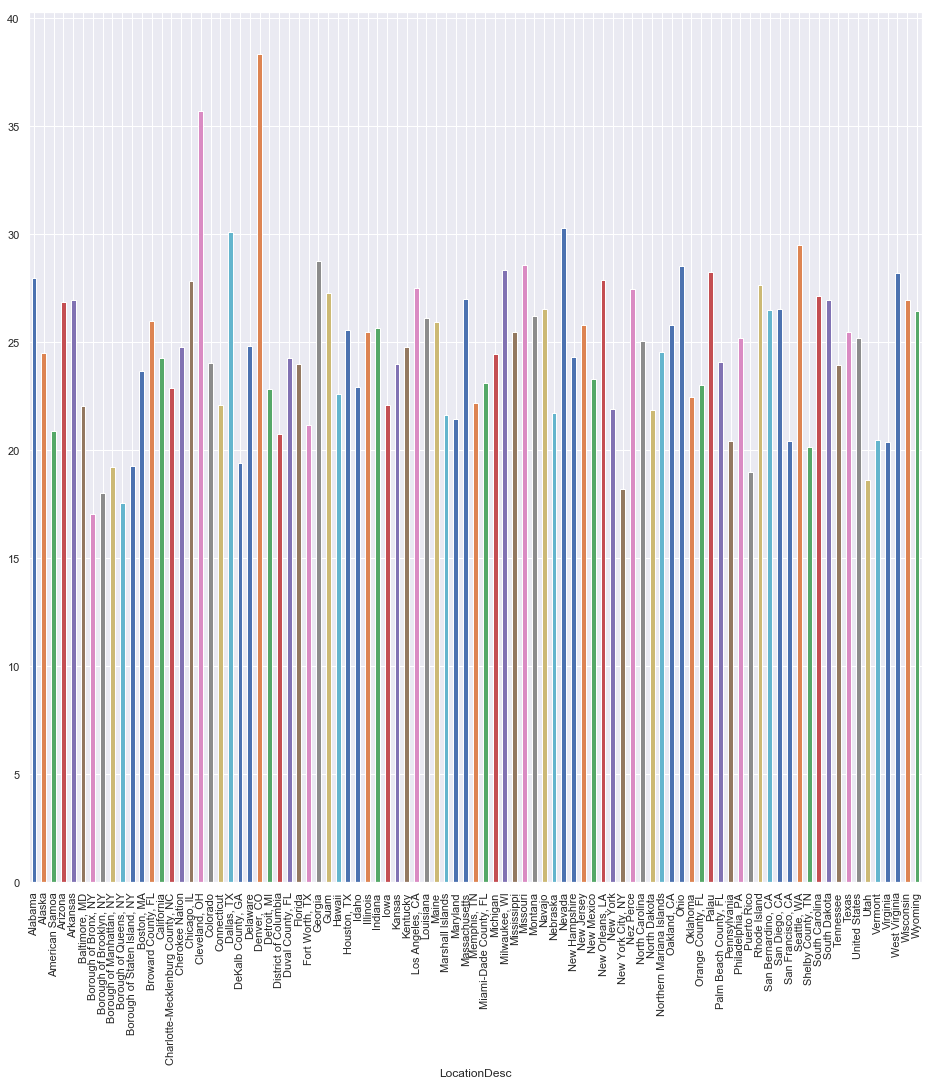

In [0]:
data.groupby('LocationDesc')['Greater_Risk_Probability'].mean().plot.bar()

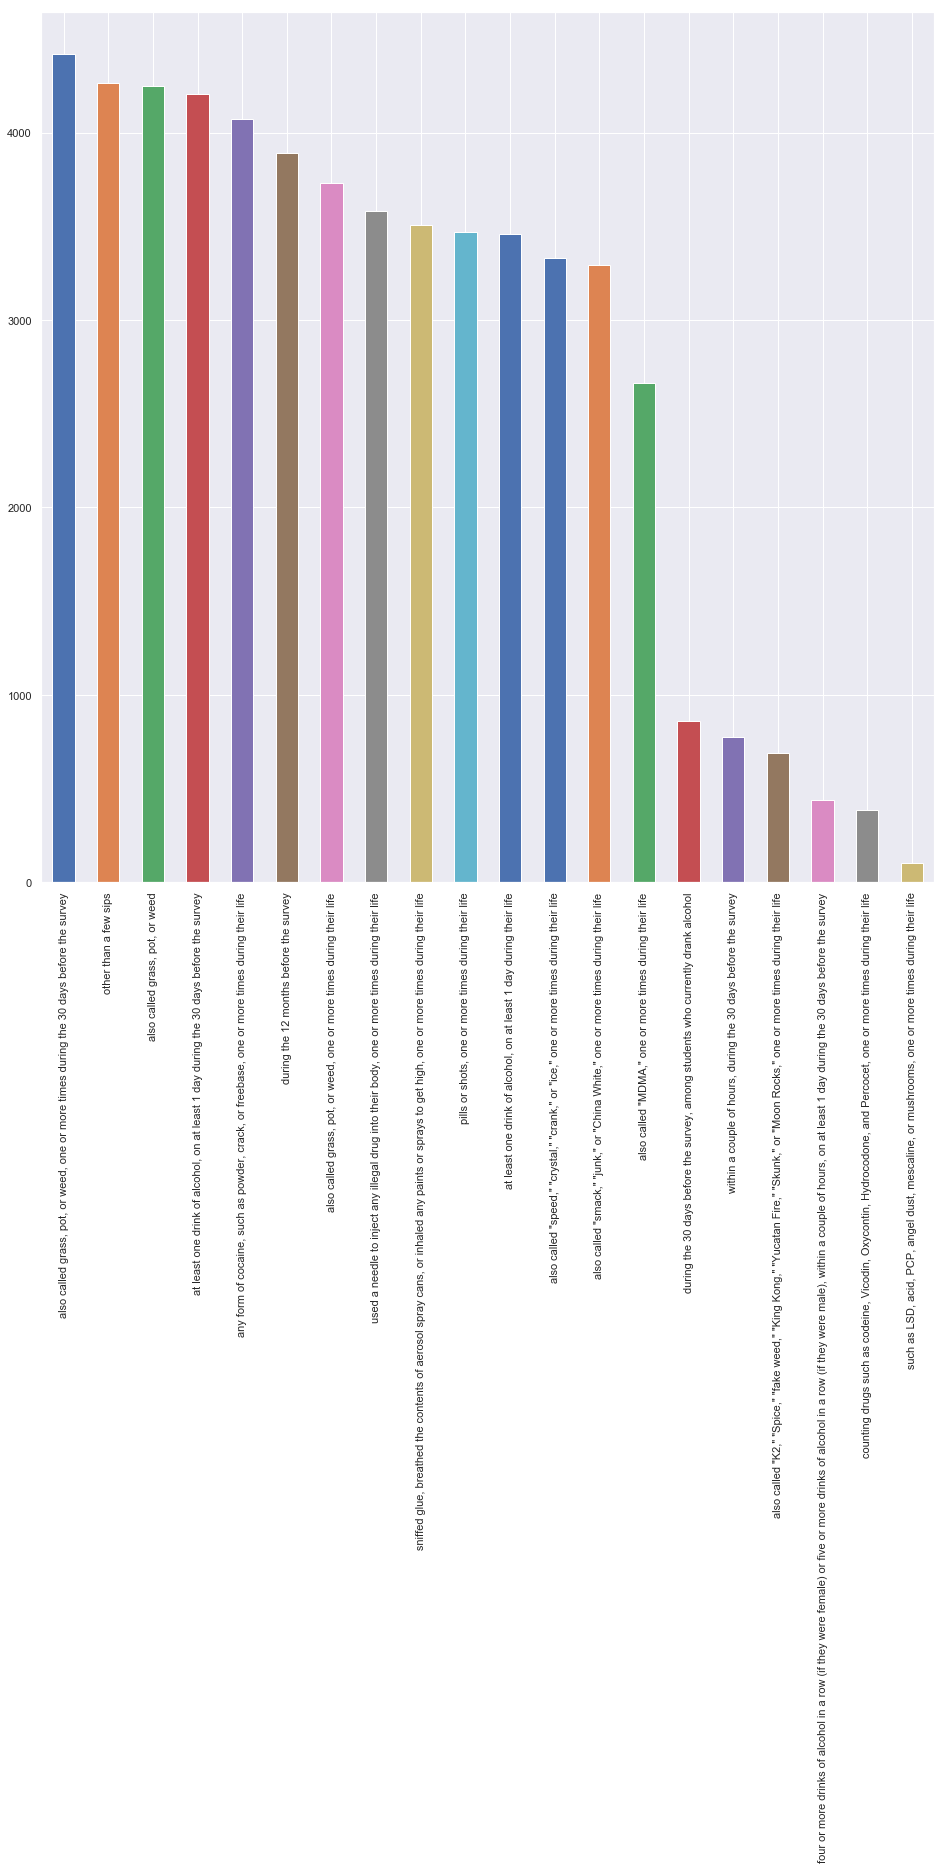

In [0]:
data.Description.value_counts().plot.bar()

In [0]:
data.Greater_Risk_Question.value_counts().plot.bar()

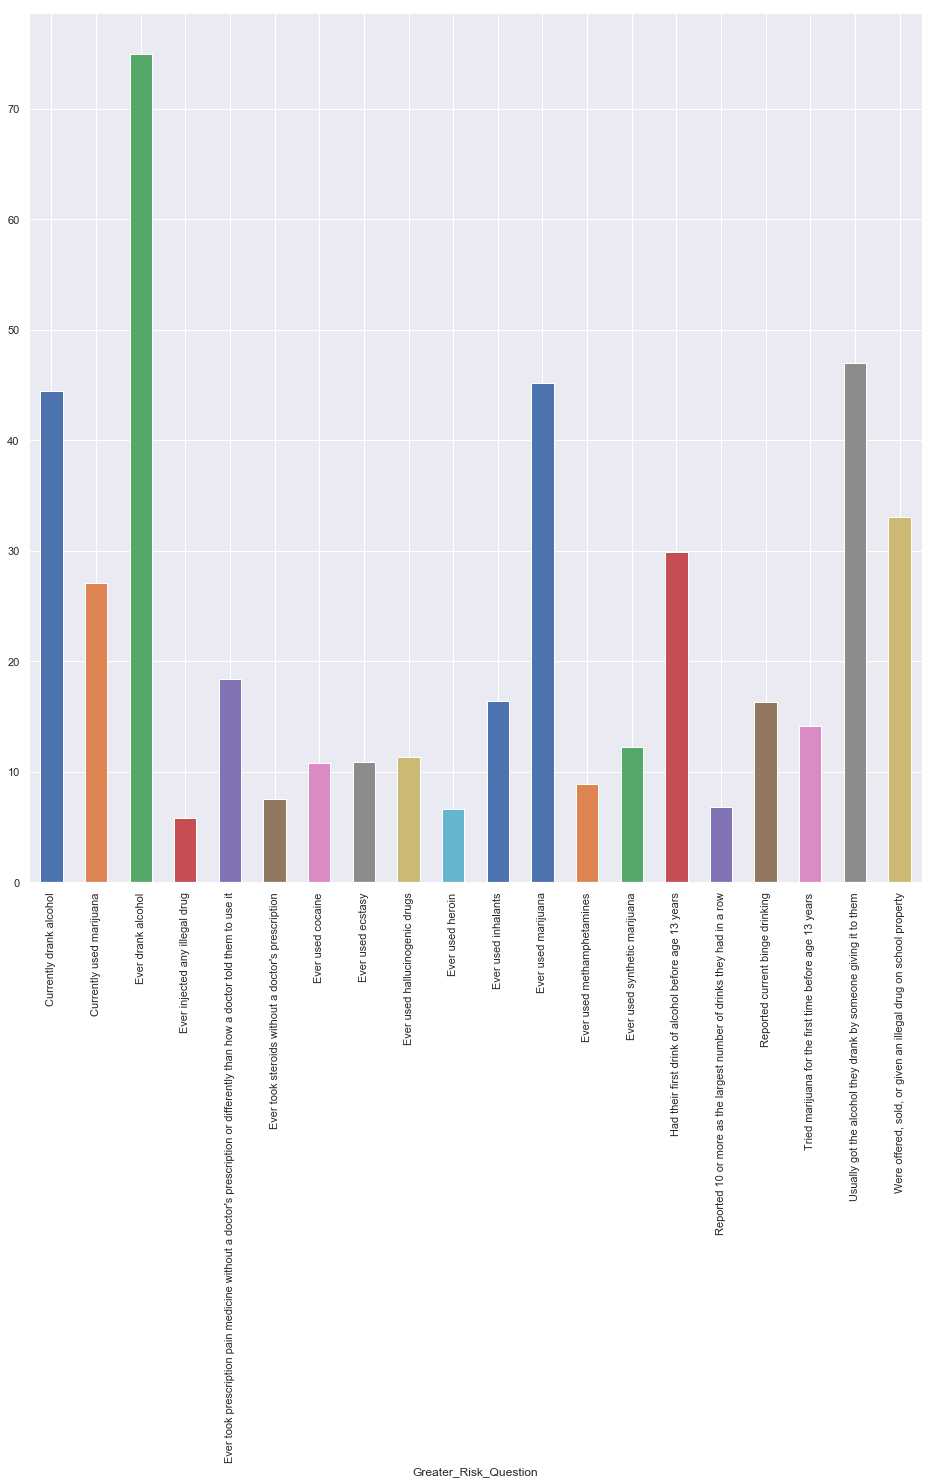

In [0]:
data.groupby('Greater_Risk_Question')['Greater_Risk_Probability'].mean().plot.bar()

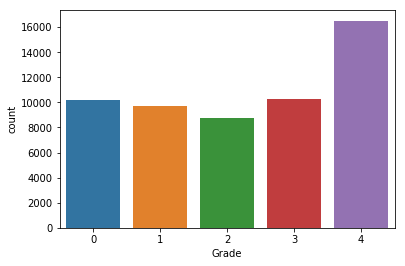

In [0]:
sns.countplot(data.Grade)

C:\Users\alpha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


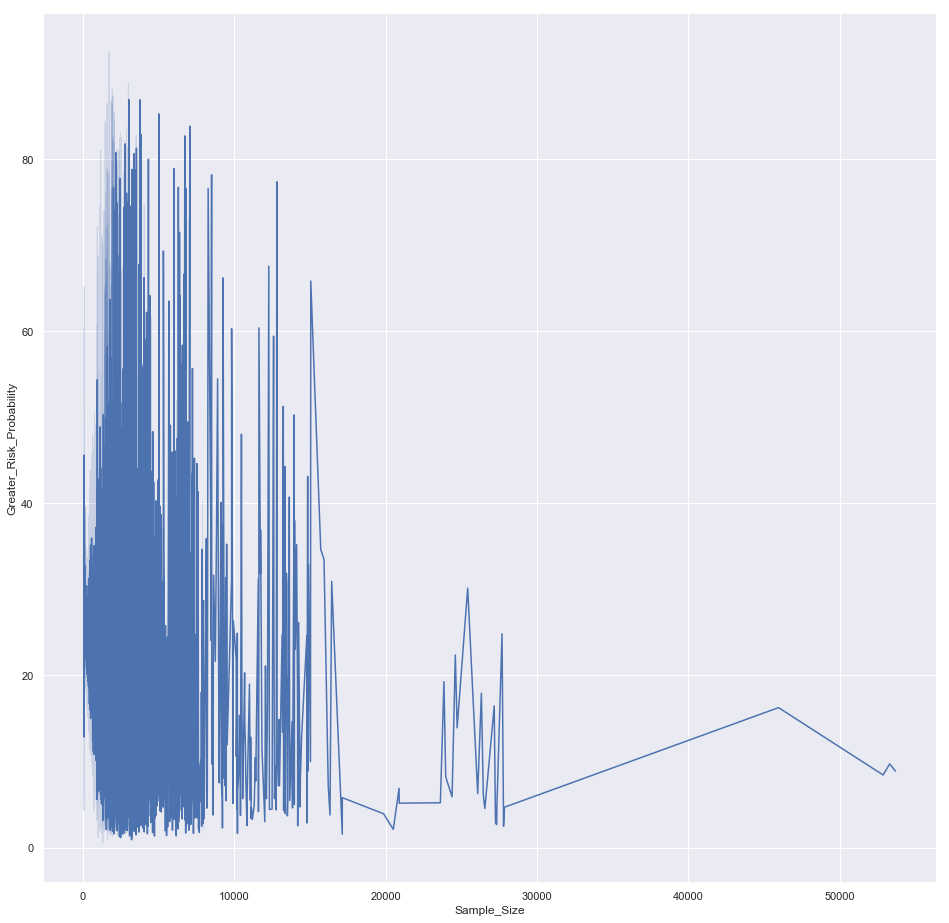

In [0]:
sns.lineplot(x=(data.Sample_Size),y=data.Greater_Risk_Probability)
#Greater_Risk Increases if grade=3 and decreases for all other

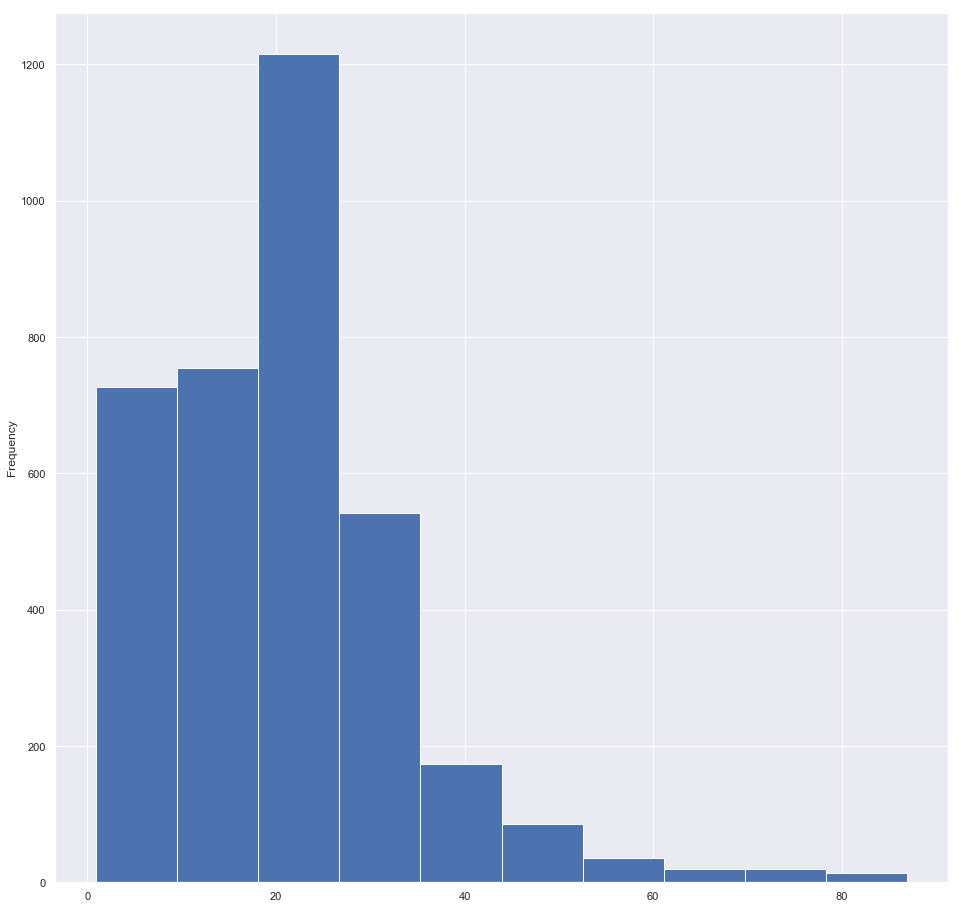

In [0]:
data.groupby('Sample_Size')['Greater_Risk_Probability'].mean().plot.hist()

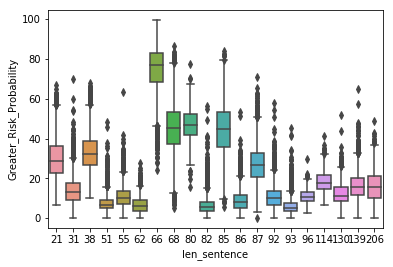

In [0]:
sns.boxplot(data.len_sentence,targets)

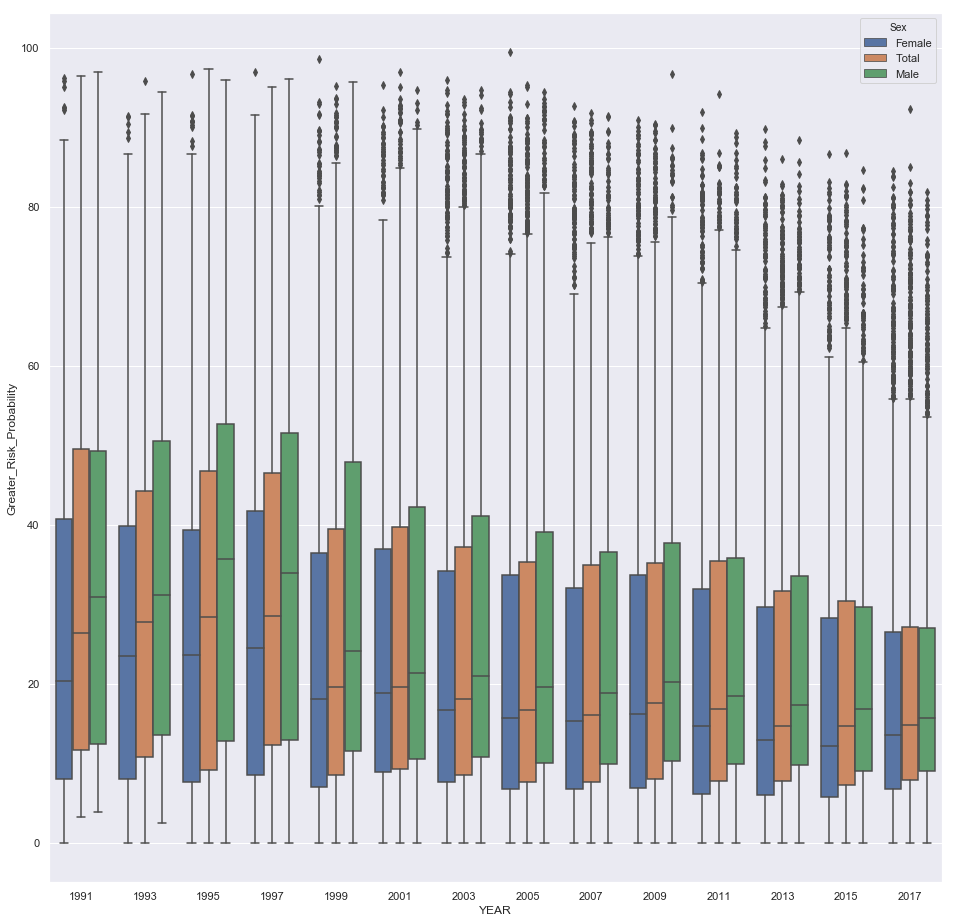

In [0]:
#fig,ax=plt.subplot(figsize=(40,40))
sns.set(rc={'figure.figsize':(16,16)})
sns.boxplot(data.YEAR,data.Greater_Risk_Probability,hue=data.Sex)

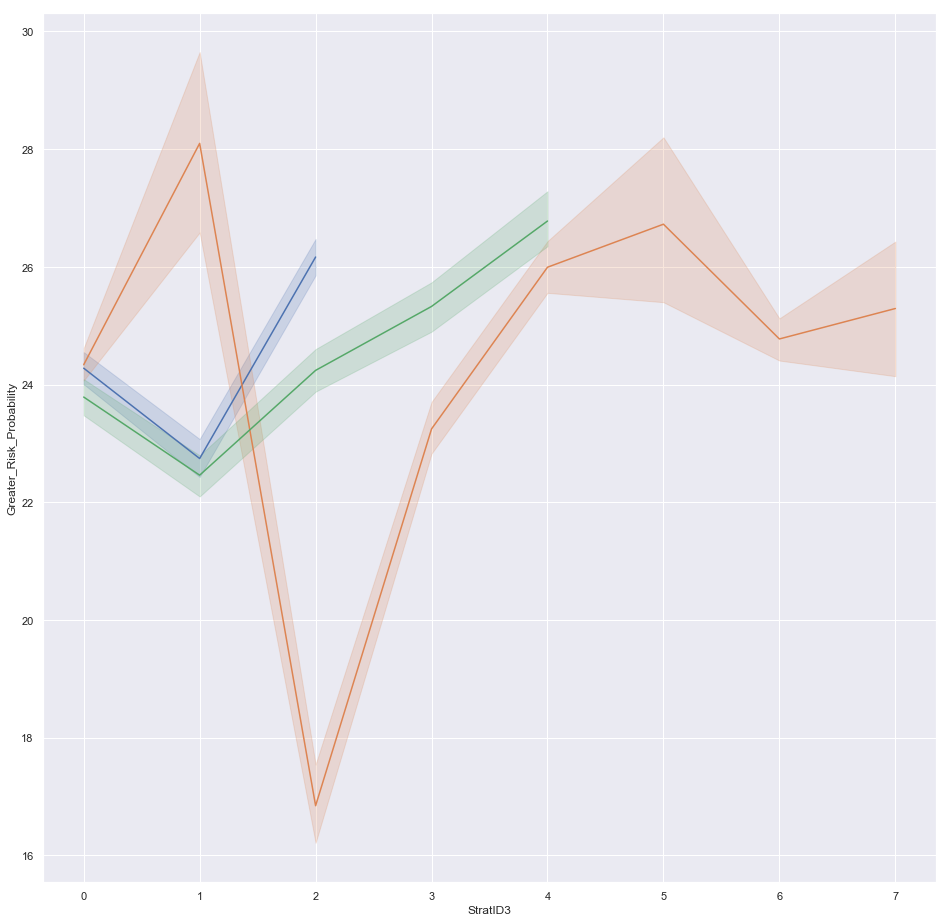

In [0]:
for i in [data.StratID1,data.StratID2,data.StratID3]:
    sns.lineplot(i,data.Greater_Risk_Probability)
    continue

In [0]:
data.Subtopic.value_counts().plot.bar()

In [0]:
sns.boxplot(data.Subtopic,data.Greater_Risk_Probability)

In [0]:
def data_augmenter(data):
  x=[]
  for i in range(len(data.Description)):
     x.append(len(data.Description[i]))
  data['len_sentence']=x
  data['Sample_Size_Category']=np.searchsorted(data.Sample_Size.values,10)
  le=LabelEncoder()
  data['Race']=le.fit_transform(data['Race'])
  data['LocationDesc']=le.fit_transform(data['LocationDesc'])
  data['Sample_Size_Category']=le.fit_transform(data['Sample_Size_Category'])
  data['QuestionCode']=le.fit_transform(data['QuestionCode'])
  data['Description']=le.fit_transform(data['Description'])
  data['Greater_Risk_Question']=le.fit_transform(data.Greater_Risk_Question)
  data['StratificationType']=le.fit_transform(data['StratificationType'])
  data['Sex']=data['Sex'].map({'Female':1,'Total':2,'Male':3})
  data.drop(['GeoLocation'],axis=1,inplace=True)
  targets=data.Greater_Risk_Probability
  data.drop('Greater_Risk_Probability',axis=1,inplace=True)
  data.drop('Patient_ID',axis=1,inplace=True)
  return data,targets
  

In [0]:
import keras
from keras import *
from keras.layers import *
from keras.optimizers import Adadelta
from keras.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Model
from keras.initializers import 


In [0]:
def model_1():
  x=Input(shape=(16,))
  y_=Dense(256,activation='relu')(x)
  y_=Dropout(0.5)(y_)
  y_=Dense(128,activation='tanh')(y_)
  y_=Dropout(0.5)(y_)
  y_=Dense(64,activation='tanh')(y_)
  outputs=Dense(16)(y_)
 #model.compile(optimizer=adam,loss='mse',metrics=['mse'])
  #return model
  x_1=Input(shape=(16,))
  y=Dense(64,kernel_initializer='he_normal',activation=tf.nn.elu)(x_1)
  y=Dense(128,kernel_initializer='he_normal',activation=tf.nn.elu)(y)
  y=Dense(256,kernel_initializer='he_normal',activation=tf.nn.elu)(y)
  output=Dense(16,kernel_initializer='he_normal')(y)
  output_1=Add()([output,outputs])
  output=Dense(1)(output_1)
  models=Model([x,x_1],output)
  adam=Adadelta()
  models.compile(optimizer=adam,loss='mse',metrics=['mse'])
  return models

  

In [116]:
?keras.intializers

Object `keras.intializers` not found.


In [0]:
def model():
  model=Sequential()
  model.add(Dense(128,kernel_initializer='he_normal',input_shape=(16,),activation=tf.nn.elu))
  model.add(Dense(64,kernel_initializer='he_normal',activation=tf.nn.elu))
  model.add(Dense(32,kernel_initializer='he_normal',activation=tf.nn.elu))
  model.add(Dense(1,kernel_initializer='he_normal'))
  adam=Adadelta()
  model.compile(optimizer=adam,loss='mse',metrics=['mse'])
  return model
           

In [0]:
data_aug,targets=data_augmenter(data.copy())

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_aug=ss.fit_transform(data_aug)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_aug,targets,test_size=0.2)

In [119]:
modela=model_1()
modela.fit([X_train,X_train],y_train,epochs=100,batch_size=64,validation_data=([X_test,X_test],y_test))

Train on 44319 samples, validate on 11080 samples
Epoch 1/100
44319/44319 [==============================] - 6s 126us/step - loss: 86.3381 - mean_squared_error: 86.3381 - val_loss: 53.5115 - val_mean_squared_error: 53.5115
Epoch 2/100
44319/44319 [==============================] - 4s 98us/step - loss: 49.0826 - mean_squared_error: 49.0826 - val_loss: 52.8107 - val_mean_squared_error: 52.8107
Epoch 3/100
44319/44319 [==============================] - 4s 89us/step - loss: 46.2999 - mean_squared_error: 46.2999 - val_loss: 49.5371 - val_mean_squared_error: 49.5371
Epoch 4/100
44319/44319 [==============================] - 4s 88us/step - loss: 44.0132 - mean_squared_error: 44.0132 - val_loss: 43.1249 - val_mean_squared_error: 43.1249
Epoch 5/100
44319/44319 [==============================] - 4s 88us/step - loss: 42.8958 - mean_squared_error: 42.8958 - val_loss: 42.5972 - val_mean_squared_error: 42.5972
Epoch 6/100
44319/44319 [==============================] - 4s 88us/step - loss: 41.6597 -

In [120]:
modela.evaluate([X_test,X_test],y_test)

11080/11080 [==============================] - 1s 49us/step


[32.29869173924415, 32.29869173924415]

In [0]:
?modela.fit

In [84]:
?model.fit

Object `model.fit` not found.


In [71]:
X_train.shape,y_train.shape

((44319, 16), (44319,))

In [0]:
?Dense

In [53]:
?

Object `model.fit` not found.


In [29]:
data_aug.shape

(55399, 16)

In [0]:
'''data_augmented,targets=data_augmenter(data.copy())
rfr=RandomForestRegressor(n_estimators=800,n_jobs=-1,max_depth=10,min_samples_split=26,max_features='auto')
#en=ElasticNet()
#lasso=Lasso()
et=ExtraTreesRegressor(n_estimators=800,n_jobs=-1,max_depth=10,min_samples_split=26,max_features='auto')
light=lightgbm.LGBMRegressor(n_estimators=9999,max_depth=6,learning_rate=0.06,reg_alpha=0.005,reg_lambda=0.1)
cat_boost=CatBoostRegressor(iterations=9999,max_depth=6,learning_rate=0.5,reg_lambda=0.3,task_type='GPU',use_best_model=True)
#svr=SVR()

kfold=KFold(n_splits=3,shuffle=True)'''

In [0]:
np.random.seed(40)
for i ,(train,val) in enumerate(kfold.split(data_augmented,targets)):
    print(f"Fold {i}")
    train_x,train_target=data_augmented.iloc[train],targets.iloc[train]
    val_X,val_target=data_augmented.iloc[val],targets.iloc[val]
    rfr.fit(train_x,train_target)
    et.fit(train_x,train_target)
    #en.fit(train_x,train_target)
    #lasso.fit(train_x,train_target)
    cat_boost.fit(train_x,train_target,early_stopping_rounds=100,eval_set=(val_X,val_target),cat_features=['Race','LocationDesc','Sample_Size_Category'
                                                                                                      ,'QuestionCode','Description','Greater_Risk_Question',
                                                                                                      'StratificationType','Sex','len_sentence'])

    light.fit(train_x,train_target,early_stopping_rounds=100,eval_set=(val_X,val_target))
        #svr.fit(train_x,train_target)
    #ensemble_1=(rfr.predict(val_X)+en.predict(val_X)+lasso.predict(val_X)+light.predict(val_X))/4
    ensemble_1=(cat.predict(val_X))*0.35+light.predict(val_X)*0.68
    ensemble_2=(rfr.predict(val_X)+light.predict(val_X)+cat_boost.predict(val_X))/3
    print('MSE_random_forest',mean_squared_error(val_target,rfr.predict(val_X)))
    print('MSE Extra_trees',mean_squared_error(val_target,et.predict(val_X)))
    #print('MSE_elastic_net',mean_squared_error(val_target,en.predict(val_X)))
    #print('MSE_lasso',mean_squared_error(val_target,lasso.predict(val_X)))
    print('MSE_light',mean_squared_error(val_target,light.predict(val_X)))
    print('MSE_ensemble_1',mean_squared_error(val_target,ensemble_1))
    print('MSE_ensemble_2', mean_squared_error(val_target,ensemble_2))
    print("Cat_results :"  ,mean_squared_error(val_target,cat_boost.predict(val_X)))
    print('Extra_trees',mean_squared_error(val_target,et.predict(val_X)))
    #print('MSE_Ensemble' mean_squared_error(val_target,(rfr.predict(val_X)+en.predict(val_X)+lasso.predict(val_X)+svr.predict(val_X)/5)))

Fold 0
0:	learn: 17.6323621	test: 17.4261626	best: 17.4261626 (0)	total: 54.2ms	remaining: 9m 1s
1:	learn: 11.1954346	test: 11.0723088	best: 11.0723088 (1)	total: 114ms	remaining: 9m 28s
2:	learn: 8.6643590	test: 8.5637736	best: 8.5637736 (2)	total: 168ms	remaining: 9m 18s
3:	learn: 7.5952114	test: 7.4729030	best: 7.4729030 (3)	total: 225ms	remaining: 9m 21s
4:	learn: 7.2796824	test: 7.1516015	best: 7.1516015 (4)	total: 286ms	remaining: 9m 32s
5:	learn: 7.0344745	test: 6.8532922	best: 6.8532922 (5)	total: 333ms	remaining: 9m 14s
6:	learn: 6.8415854	test: 6.6595010	best: 6.6595010 (6)	total: 371ms	remaining: 8m 50s
7:	learn: 6.7682972	test: 6.5874205	best: 6.5874205 (7)	total: 414ms	remaining: 8m 36s
8:	learn: 6.6219594	test: 6.4472219	best: 6.4472219 (8)	total: 456ms	remaining: 8m 26s
9:	learn: 6.5557319	test: 6.3839525	best: 6.3839525 (9)	total: 496ms	remaining: 8m 15s
10:	learn: 6.4362041	test: 6.2602788	best: 6.2602788 (10)	total: 530ms	remaining: 8m 1s
11:	learn: 6.3838253	test: 6.

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_augmented,targets)

In [0]:
cat_boost.fit(X_train,y_train,cat_features=['Race','LocationDesc','Sample_Size_Category'
                                                                                        ,'QuestionCode','Description','Greater_Risk_Question',
                                                                                                      'StratificationType','Sex','len_sentence'],eval_set=(X_test,y_test),early_stopping_rounds=100)

In [0]:
mean_squared_error(y_test,cat_boost.predict(X_test))

22.390751635346188

In [0]:
light.fit(X_train,y_train,eval_set=(X_test,y_test),early_stopping_rounds=100)

[1]	valid_0's l2: 377.273
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 339.872
[3]	valid_0's l2: 306.801
[4]	valid_0's l2: 277.539
[5]	valid_0's l2: 251.69
[6]	valid_0's l2: 228.738
[7]	valid_0's l2: 208.445
[8]	valid_0's l2: 190.439
[9]	valid_0's l2: 174.435
[10]	valid_0's l2: 160.22
[11]	valid_0's l2: 147.645
[12]	valid_0's l2: 136.487
[13]	valid_0's l2: 126.563
[14]	valid_0's l2: 117.775
[15]	valid_0's l2: 109.957
[16]	valid_0's l2: 102.926
[17]	valid_0's l2: 96.7846
[18]	valid_0's l2: 91.3197
[19]	valid_0's l2: 86.3373
[20]	valid_0's l2: 81.9848
[21]	valid_0's l2: 77.9389
[22]	valid_0's l2: 74.4492
[23]	valid_0's l2: 71.2966
[24]	valid_0's l2: 68.5166
[25]	valid_0's l2: 65.9759
[26]	valid_0's l2: 63.7482
[27]	valid_0's l2: 61.725
[28]	valid_0's l2: 59.9183
[29]	valid_0's l2: 58.2063
[30]	valid_0's l2: 56.7484
[31]	valid_0's l2: 55.3319
[32]	valid_0's l2: 54.0475
[33]	valid_0's l2: 52.951
[34]	valid_0's l2: 51.9243
[35]	valid_0's l2: 50.9838
[36]	

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.06, max_depth=6,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=9999, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.005, reg_lambda=0.1, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
mean_squared_error(y_test,light.predict(X_test))

18.588064419614586